In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# 1. Combined Cycle Power Plant Data Set
# The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.


## (a) Download the Combined Cycle Power Plant data1 from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [2]:
df = pd.read_excel("../data/Folds5x2_pp.xlsx", sheet_name='Sheet1')

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## (b) Exploring the data:
## i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [4]:
print(f'No. of Rows = {len(df)} \nNo. of Columns = {len(df.columns)}')
print('Every row consists of 4 features, namely, Ambient Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP) and Relative Humidity (RH) -- these features are then used to predict the net hourly electric energy (PE/ EP) of the plant')

No. of Rows = 9568 
No. of Columns = 5
Every row consists of 4 features, namely, Ambient Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP) and Relative Humidity (RH) -- these features are then used to predict the net hourly electric energy (PE/ EP) of the plant


## ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

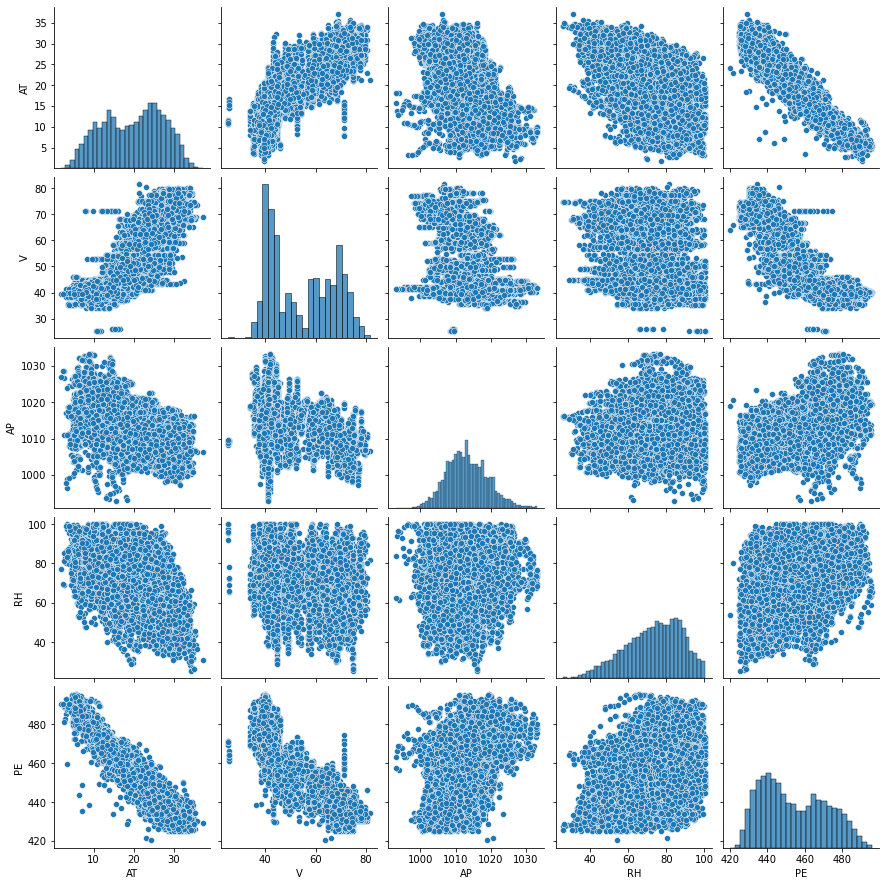

In [5]:
sns.pairplot(df)
# for i in range(len(df.columns)-1):
#     plt.scatter(x = df.iloc[:,i], y = df.iloc[:,-1])
#     plt.title(f'Pairwise Scatterplot of {df.columns[i]} vs {df.columns[-1]}')
#     plt.xlabel(f'{df.columns[i]}')
#     plt.ylabel(f'{df.columns[-1]}')
#     plt.show()

1. In AT vs PE, we see an strong negative correlation between the two variables. As AT increases the EP decreases.
1. In V vs PE, we see a negative correlation but not necessarily as strong as AT vs PE. As V increases, the general trend of PE decreases
1. In AP vs PE, we see a positive correlation between the two variables as when AP increases PE tends to increase also.
1. In RH vs PE, it is hard to see the correlation between the two variables.

## iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [6]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
stats = []
for i, col in enumerate(df.columns):
    mean = df.describe().iloc[1,i]
    median = df.describe().iloc[5,i]
    _range = df.describe().iloc[7,i] - df.describe().iloc[3,i]
    q1 = df.describe().iloc[4,i]
    q3 = df.describe().iloc[6,i]
    iqr = q3 - q1
    stats.append([col, mean, median, _range, q1, q3, iqr])

description = pd.DataFrame(stats, columns = ['Feature', 'Mean', 'Median', 'Range', 'Q1', 'Q3', 'IQR'])
description


,Feature,Mean,Median,Range,Q1,Q3,IQR
0,AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
1,V,54.305804,52.080,56.20,41.7400,66.54,24.8000
2,AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
3,RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
4,PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


## (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

P-Value of Predictor AT = 0.0
Strong Association between Predictor and Response
Number of outliers = 416
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:24   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

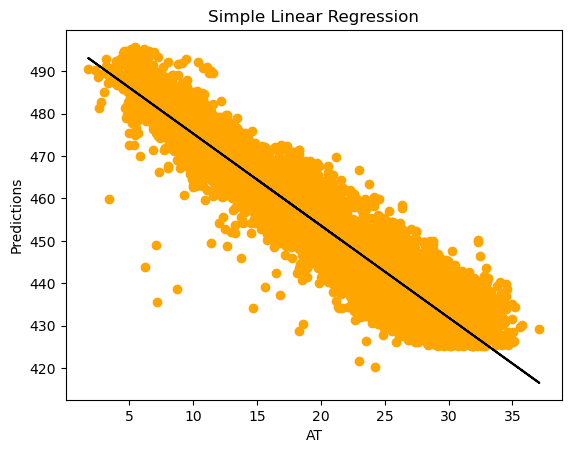

P-Value of Predictor V = 0.0
Strong Association between Predictor and Response
Number of outliers = 423
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:24   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

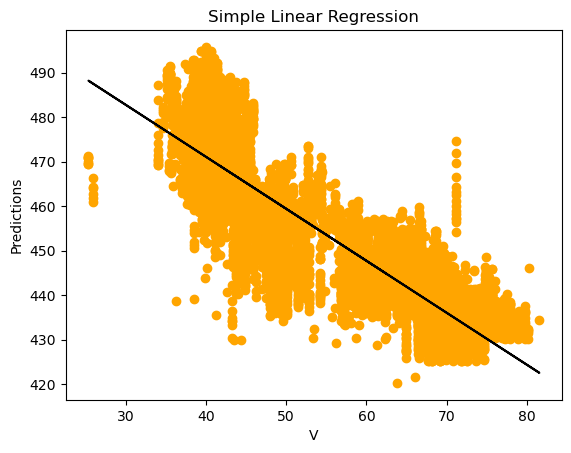

P-Value of Predictor AP = 0.0
Strong Association between Predictor and Response
Number of outliers = 300
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:24   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

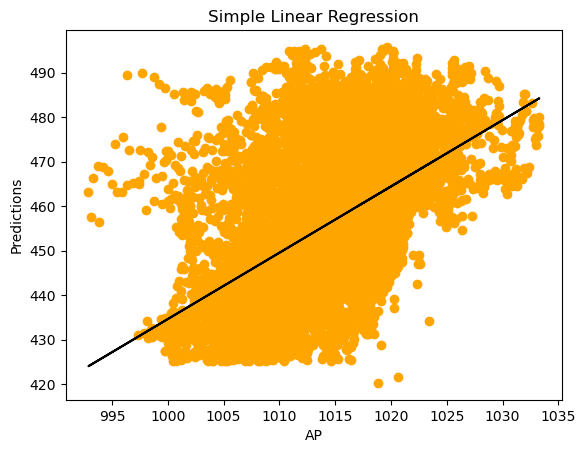

P-Value of Predictor RH = 0.0
Strong Association between Predictor and Response
Number of outliers = 249
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:24   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

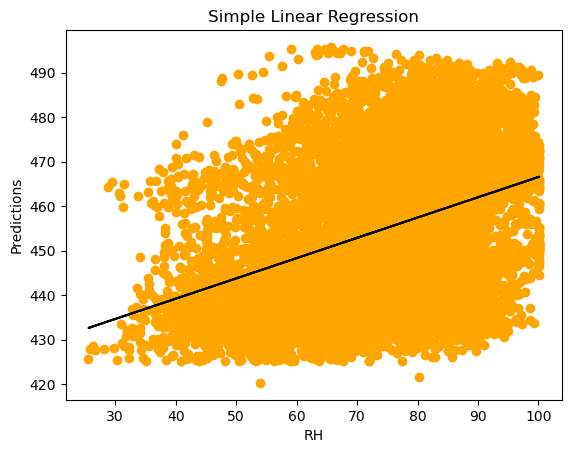

In [8]:
linear_coeff = []
for i in range(len(df.columns)-1):
    X = df.iloc[:,i]
    y = df.iloc[:,-1]
    X_OLS = sm.add_constant(X)
    model = sm.OLS(y, X_OLS).fit()
    print(f"P-Value of Predictor {df.columns[i]} = {model.pvalues[1]}")
    print("Strong Association between Predictor and Response") if model.pvalues[1] < 0.05 else print("No Association")
    y_hat = model.predict(X_OLS)
    cook_distance = OLSInfluence(model).cooks_distance
    distance, p_value = cook_distance
    threshold = 4 / len(X)
    outliers = distance[distance > threshold]
    print(f"Number of outliers = {len(outliers)}")
    print(model.summary())
    plt.scatter(x = X, y = y, color='orange')
    plt.plot(X, y_hat , color='black')
    plt.title('Simple Linear Regression')
    plt.xlabel(f'{df.columns[i]}')
    plt.ylabel(f'Predictions')
    plt.show()
    linear_coeff.append(model.params)
    

> 1. We see that with predictor AT, we get an R2 score of 0.89 with a p-value of 0.0. This predictor is statistically significant because p-value < 0.05, the plotted graph shows that when AT increases the Predicted value decreases.
> 1. We see that with predictor V, we get an R2 score of 0.757 with a p-value of 0.0. This predictor is statistically significant because p-value < 0.05, the plotted graph shows that when V increases the Predicted value decreases.
> 1. We see that with predictor AP, we get an R2 score of 0.269 with a p-value of 0.0. This predictor is statistically significant because p-value < 0.05 but does not have a R2 score as strong as the others, the plotted graph shows that when AP increases the Predicted values trend also increases but the relationship is not as strong.
> 1. We see that with predictor RH, we get an R2 score of 0.152 with a p-value of 0.0. This predictor is statistically significant because p-value < 0.05 but has the lowest R2 score, the plotted graph shows that when AP increases the Predicted values trend also increases, the low R2 score does not mean that the predictor is not statistically significant but instead proves that even with a low R2 score, a variable can have a significant trend

## (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [9]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_OLS = sm.add_constant(X)
model = sm.OLS(y, X_OLS).fit()
multi_coeff = model.params
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:24   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

> 1. With multiple regression, we get an R2 score of 0.929 which is very good and all the predictors are statistically significant as the pvalues are 0 - which is less than 0.05
> 1. Since the P-values of all predictors are less than < 0.05 we can reject the null hypothesis for all of them.

## (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

Linear Regression Coefficients
AT = -2.1713199585177856
V = -1.168135126555712
AP = 1.4898716733991142
RH = 0.45565010226298336
**************************************************
Multiple Regression Coefficients
AT = -1.9775131066353744
V = -0.23391642258250134
AP = 0.06208294378085466
RH = -0.15805410291641542


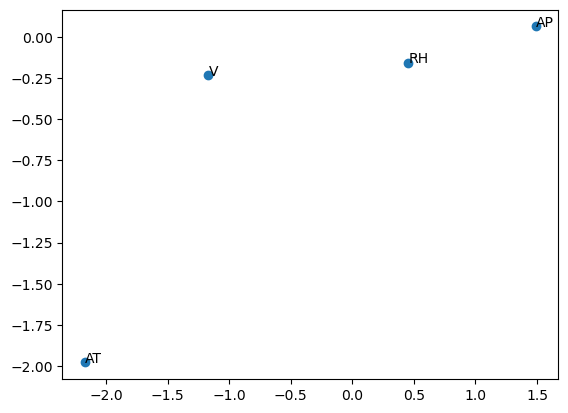

In [10]:
linear = [i[1] for i in linear_coeff]
multi = [i for i in multi_coeff[1:]]
fig, ax = plt.subplots()
plt.scatter(linear, multi)

for i, txt in enumerate(X.columns):
    ax.annotate(txt, (linear[i], multi[i]))

print(f"Linear Regression Coefficients")
for i in range(len(X.columns)):
    print(f"{X.columns[i]} = {linear[i]}")
print("*"*50)
print(f"Multiple Regression Coefficients")
for i in range(len(X.columns)):
    print(f"{X.columns[i]} = {multi[i]}")

> 1. From the simple linear regression for each predictor experiment, we learn that AT and V are strong predictors with very large R2 scores and low p-values and contribute significantly to predicting the dependent variable. We also learn than AP and RH are significant variables with low p-values, but individually, they have a low R2 score.
> 1. From the multiple linear regression experiment, we learn that the R2 score is very good when we include all the features and all the features are significant with a low p-value score contributing to the dependent variable predictions.
> 1. From the two experiments, we can summarise that multiple linear regression works better on this dataset.

## (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2
## Y =β0 +β1X+β2X2 +β3X3 +ε


For column AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:24   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    73

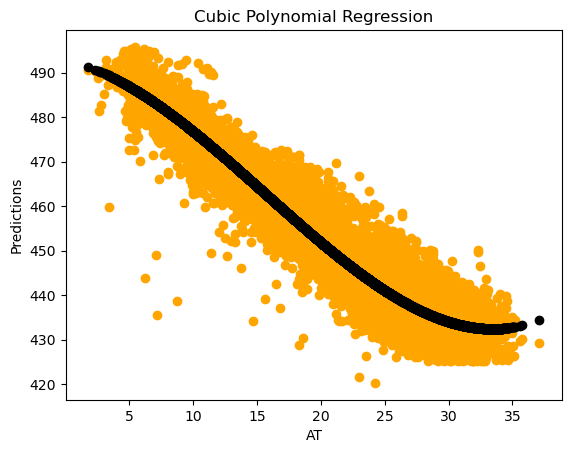

For column V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:25   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60

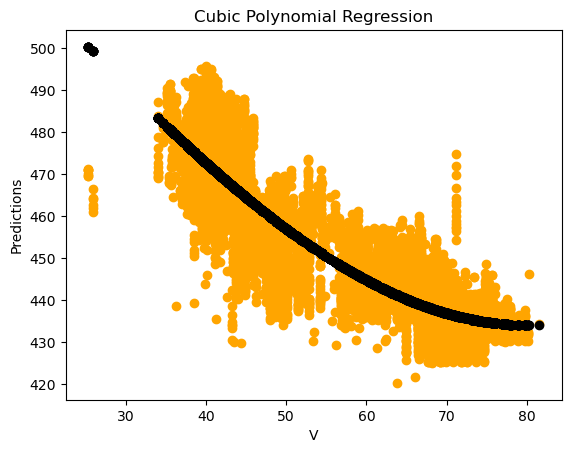

For column AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:25   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      

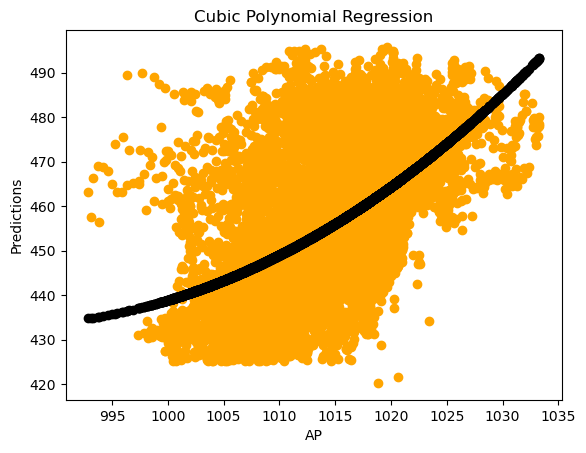

For column RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:25   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     4

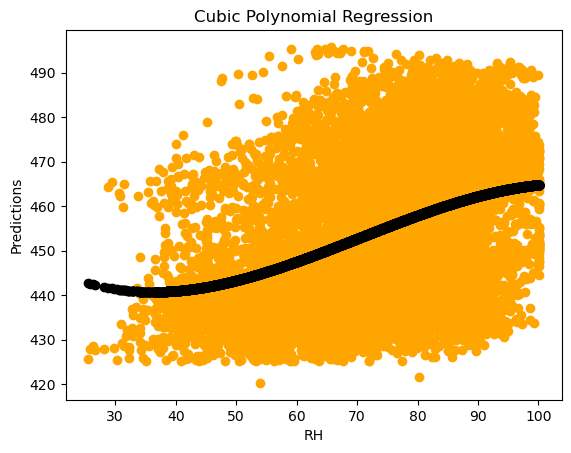

In [11]:
for i in range(len(df.columns)-1):
    print(f"For column {df.columns[i]}")
    X = df.iloc[:,i]
    X = X.values.reshape(-1,1)
    y = df.iloc[:,-1]
#     X_OLS = sm.add_constant(X)
    X_OLS = X
    polynomial_features= PolynomialFeatures(degree=3)
    X_poly = polynomial_features.fit_transform(X_OLS)
    model = sm.OLS(y, X_poly).fit()
    y_hat = model.predict(X_poly)
    print(model.summary())
    plt.scatter(x = X, y = y, color='orange')
    plt.scatter(x = X, y = y_hat, color = 'black')
    plt.title(f'Cubic Polynomial Regression')
    plt.xlabel(f'{df.columns[i]}')
    plt.ylabel(f'Predictions')
    plt.show()

> 1. For predictor AT, we see that there is a quadratic and cubic association with the predictor (p-values < 0.05) and R2 score of 0.912
> 1. For predictor V, we see that there is a cubic association with the predictor (p-value < 0.05) and R2 score of 0.775
> 1. For predictor AP, we see that there is a quadratic and cubic association with the predictor (p-values < 0.05) and R2 score of 0.275
> 1. For predictor RH, we see that there is a quadratic and cubic association with the predictor (p-values < 0.05) and R2 score of 0.154

## (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_new = X.copy()
y = y.copy()
for i in range(len(X.columns[:])):
    for j in range(i, len(X.columns[:])):
        if i != j:
            col1, col2 = X.columns[i], X.columns[j]
            X_new[f'{col1}-{col2}'] = X[col1] * X[col2]
X = X_new.copy()
X_OLS = sm.add_constant(X)
model = sm.OLS(y, X_OLS).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:25   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

> 1. The interaction terms between predictors AT and V have a P-value score of 0.0 < 0.05
> 1. The interaction terms between predictors AT and RH have a P-value score of 0.0 < 0.05
> 1. The interaction terms between predictors V and AP have a P-value score of 0.0 < 0.05
> 1. The interaction terms between predictors AP and RH have a P-value score of 0.0 < 0.05

## (h) Can you improve your model using possible interaction terms or nonlinear asso- ciations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regres- sion model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [13]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

print("Simple multiple regression")
X_OLS = sm.add_constant(X_train)
model = sm.OLS(y_train, X_OLS).fit()
y_hat = model.predict(X_OLS)
train_error = mean_squared_error(y_train, y_hat)
X_test_OLS = sm.add_constant(X_test)
y_hat = model.predict(X_test_OLS)
test_error = mean_squared_error(y_test, y_hat)
print(f"Train Error = {train_error} \nTest Error = {test_error}")
print(model.summary())


X_all = X_train.copy()
X_test_all = X_test.copy()
for i in range(len(X.columns)):
    X_all[f'{X_train.columns[i]}_2'] = X_train[X_train.columns[i]]**2
    X_test_all[f'{X_test.columns[i]}_2'] = X_test[X_test.columns[i]]**2
    
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        if i != j:
            col1, col2 = X_train.columns[i], X_train.columns[j]
            X_all[f'{col1}_{col2}'] = X_train[col1] * X_train[col2]
            X_test_all[f'{col1}_{col2}'] = X_test[col1] * X_test[col2]

print("Regression with Quadratic Nonlinearities and Interaction Terms")
X_OLS = sm.add_constant(X_all)
model = sm.OLS(y_train, X_OLS).fit()
y_hat = model.predict(X_OLS)
train_error = mean_squared_error(y_train, y_hat)
X_test_OLS = sm.add_constant(X_test_all)
y_hat = model.predict(X_test_OLS)
test_error = mean_squared_error(y_test, y_hat)
print(f"Train Error = {train_error} \nTest Error = {test_error}")
print(model.summary())

unwanted_cols = []
for i, col in enumerate(X_OLS.columns):
    if model.pvalues[i] > 0.05:
        unwanted_cols.append(col)

print(unwanted_cols)
#since AT_V has is very significant with a p_value < 0.05 we will also keep V
unwanted_cols.remove('V')
print("Insignificant Variables", unwanted_cols)

print("Regression after removing Insignificant Predictors")
X_OLS = X_OLS.drop(unwanted_cols, axis=1)
X_test_OLS = X_test_OLS.drop(unwanted_cols, axis = 1)
model = sm.OLS(y_train, X_OLS).fit()
y_hat = model.predict(X_OLS)
train_error = mean_squared_error(y_train, y_hat)
y_hat = model.predict(X_test_OLS)
test_error = mean_squared_error(y_test, y_hat)
print(f"Train Error = {train_error} \nTest Error = {test_error}")
print(model.summary())

Simple multiple regression
Train Error = 20.58083972573869 
Test Error = 21.239856938225444
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:25   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

> 1. Just the predictors without quadratic nonlinearities or interaction terms result in a Train Score of 20.58 and Test Score of 21.23 with a R2 score of 0.929.
> 1. The individual predictors with quadratic nonlinearities AND interaction terms result in a Train Score of 17.88 and Test Score of 18.64 with a R2 score of 0.938.
> 1. The individual predictors with quadratic nonlinearities AND interaction terms AFTER removing insignificant features according to what is mentioned above results in a Train Score of 17.91 and Test Score of 18.69 with a R2 score of 0.938.
> 1. Clearly, using quadratic non linearities along with interaction terms outperforms the results of just using the individual predictor. Removing the insignificant variables does not have too much impact on the performance depending on the stochastic nature of the splitting of the dataset into train and test sets.

## (i) KNN Regression:
## i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.


In [14]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
train_errors = []
test_errors = []
x_axis = [1/k for k in range(1,101)]
min_test_error = float("inf")
best_k = None
for k in range(1,101):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_train)
    train_error = mean_squared_error(y_train, y_hat)
    y_hat = model.predict(X_test)
    test_error = mean_squared_error(y_test,y_hat)
    train_errors.append(train_error)
    test_errors.append(test_error)
    if test_error < min_test_error:
        min_test_error = min(min_test_error, test_error)
        best_k = k

print(f"Raw KNN - Best K Value = {best_k} with Test Error = {min_test_error}")

Raw KNN - Best K Value = 5 with Test Error = 15.726819842563568


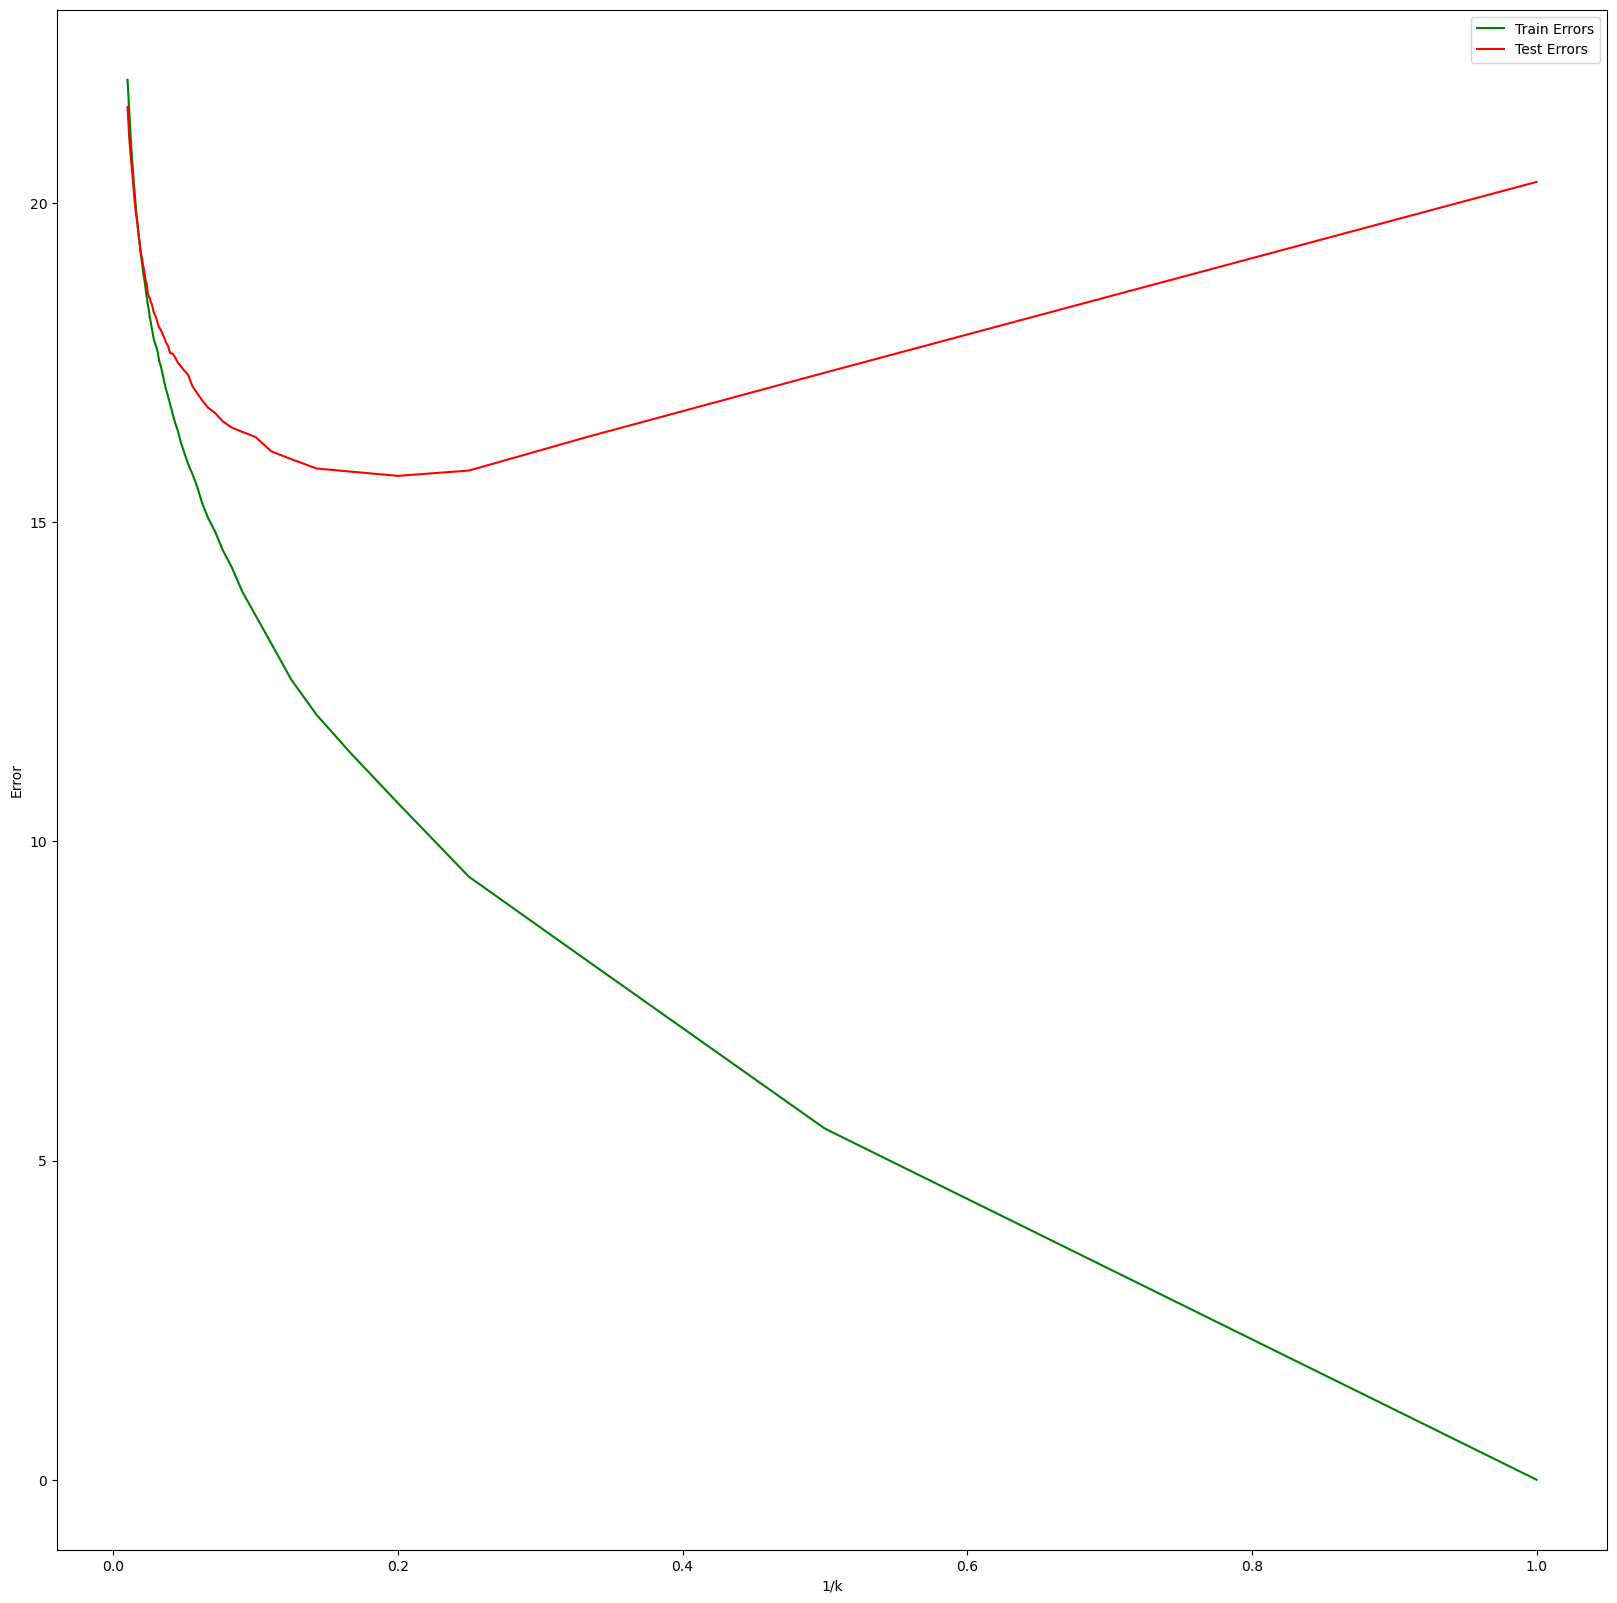

In [15]:
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(x_axis, train_errors, color = 'green', label = 'Train Errors')
ax.plot(x_axis, test_errors,  color = 'red', label = 'Test Errors')
ax.set(xlabel="1/k",ylabel="Error")
ax.legend()

In [16]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
train_errors = []
test_errors = []
x_axis = [1/k for k in range(1,101)]
min_test_error = float("inf")
best_k = None
for k in range(1,101):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_train)
    train_error = mean_squared_error(y_train, y_hat)
    y_hat = model.predict(X_test)
    test_error = mean_squared_error(y_test,y_hat)
    train_errors.append(train_error)
    test_errors.append(test_error)
    if test_error < min_test_error:
        min_test_error = min(min_test_error, test_error)
        best_k = k

print(f"Normalised KNN - Best K Value = {best_k} with Test Error = {min_test_error}")

Normalised KNN - Best K Value = 4 with Test Error = 14.305669422675024


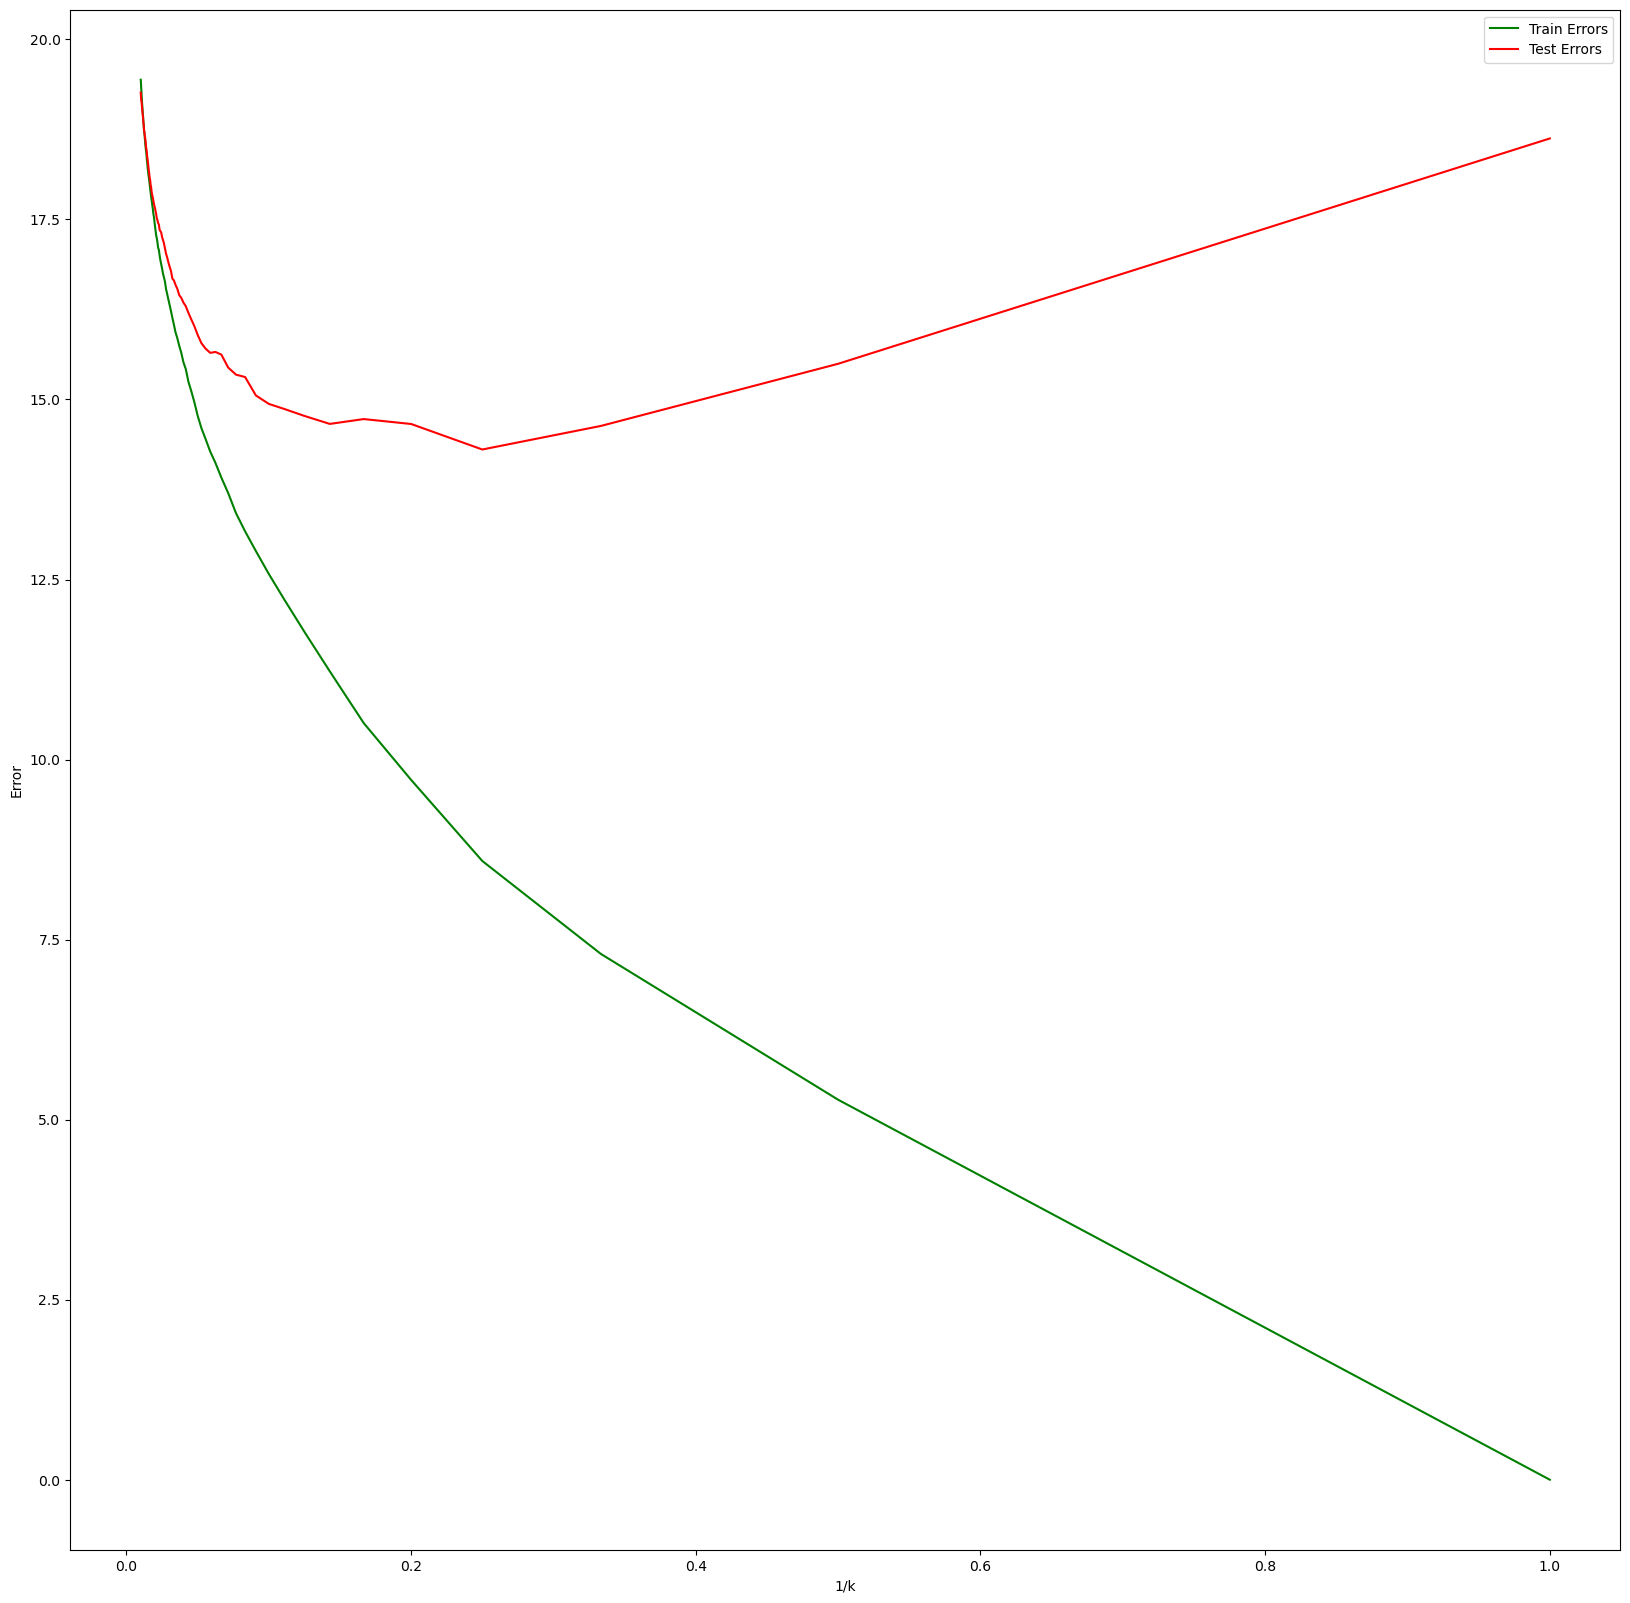

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(x_axis, train_errors, color = 'green', label = 'Train Errors')
ax.plot(x_axis, test_errors,  color = 'red', label = 'Test Errors')
ax.set(xlabel="1/k",ylabel="Error")
ax.legend()

## j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

> 1. Normalised KNN Regression outperforms Raw KNN Regression with respect to the Test Error scores. Normalised KNN Regression also contains the lowest Test Error score compared to all the Linear Regression Models build so far with and without interaction terms.

# 2. ISLR: 2.4.1 - For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

## (a) The sample size n is extremely large, and the number of predictors p is small.

> Flexible statistical learning method would be better than an inflexible one here - flexible model fits the data better when number of predictors are fewer.

## (b) The number of predictors p is extremely large, and the number of observations n is small.

> A small sample size increases the risk of overfitting for flexible models, and large p could lead to curse of dimensionality so Inflexible method would be better here.

## (c) The relationship between the predictors and response is highly non-linear.

> When the relationship between predictors and response is highly non-linear, Flexible methods would be better than Inflexible ones flexible fits better since complex relationships can be modelled easier using Flexible methods.

## (d) The variance of the error terms, i.e. σ2 = Var(), is extremely high.

> Inflexible method is better than flexible ones when variance is high because the flexible method would just overfit the data, which leads to bad performance. Inflexible model would generalise well here on unseen data.

# SLR: 2.4.7 - The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

In [18]:
table = [[0,3,0,'Red'],[2,0,0,'Red'],[0,1,3,'Red'],[0,1,2,'Green'],[-1,0,1,'Green'],[1,1,1,'Red']]
df = pd.DataFrame(table, columns = ['X1','X2','X3','Y'])

## a) Compute the Euclidean distance between each observation and the test point, X1=X2=X3=0

In [19]:
dist = []
for x,y,z,w in table:
    temp = x**2 + y**2 + z**2
    dist.append(pow(temp, 0.5))
dist

[3.0,
 2.0,
 3.1622776601683795,
 2.23606797749979,
 1.4142135623730951,
 1.7320508075688772]

## (b) What is our prediction with K = 1? Why?

> Closest Point to (0,0,0) has the distance 1.414 which is (-1,0,1) - hence, Green

## (c) What is our prediction with K = 3? Why?

> Three closest points to (0,0,0) based on Euclidean Distance are (-1,0,1), (1,1,1) and (2, 0, 0). By majority polling, the prediction is Red

## (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

> Best value for K would be small because smaller k values enable better fit of data - non linear should have less neighbors because of high various, k will be expected to be smaller.